In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data = data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

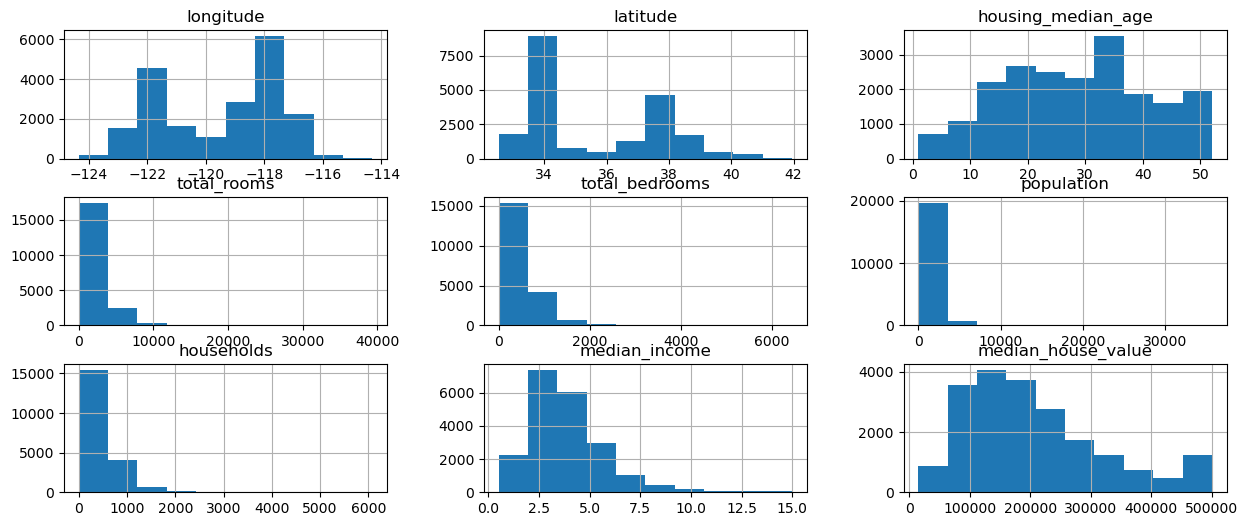

In [6]:
data.hist(figsize=(15, 6))

C:\Users\ojasa\AppData\Local\Temp\ipykernel_34892\1545474440.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

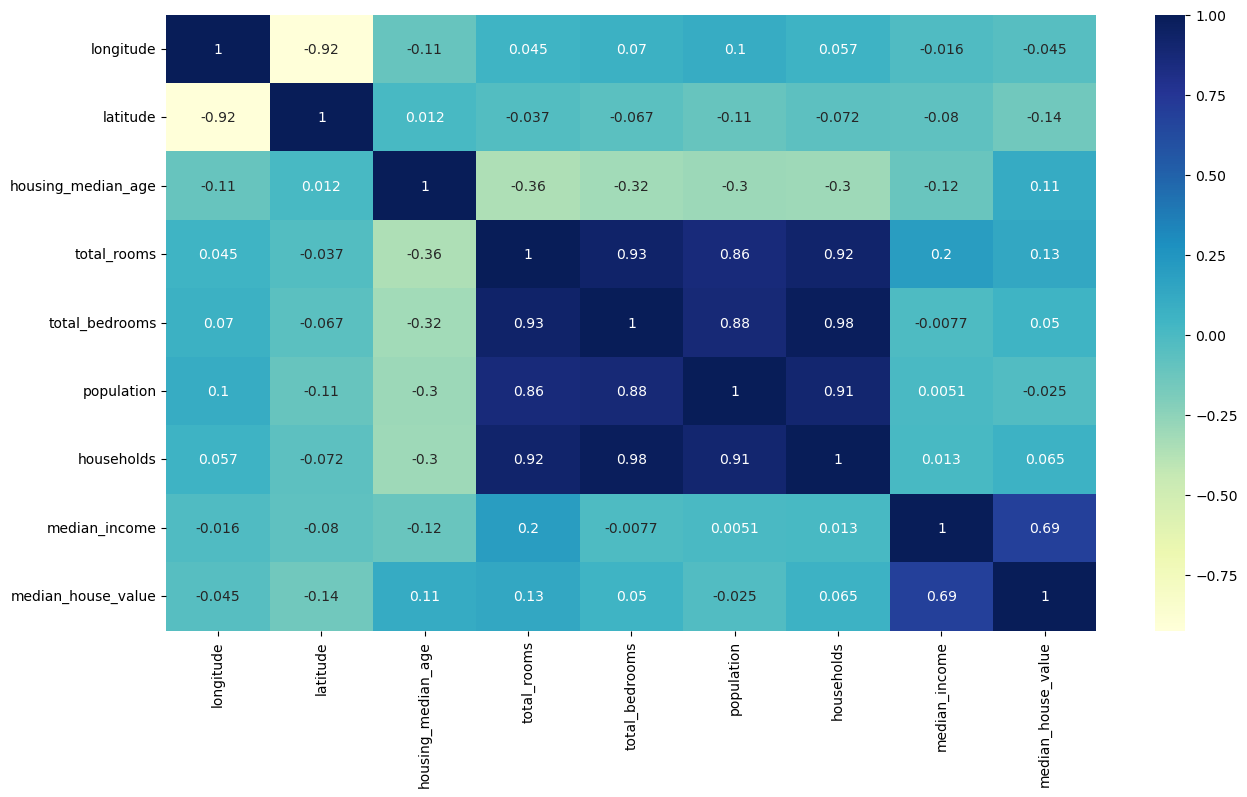

In [7]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [8]:
data["total_rooms"] = np.log(data['total_rooms']+1)
data["total_bedrooms"] = np.log(data['total_bedrooms']+1)
data["population"] = np.log(data['population']+1)
data["households"] = np.log(data['households']+1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

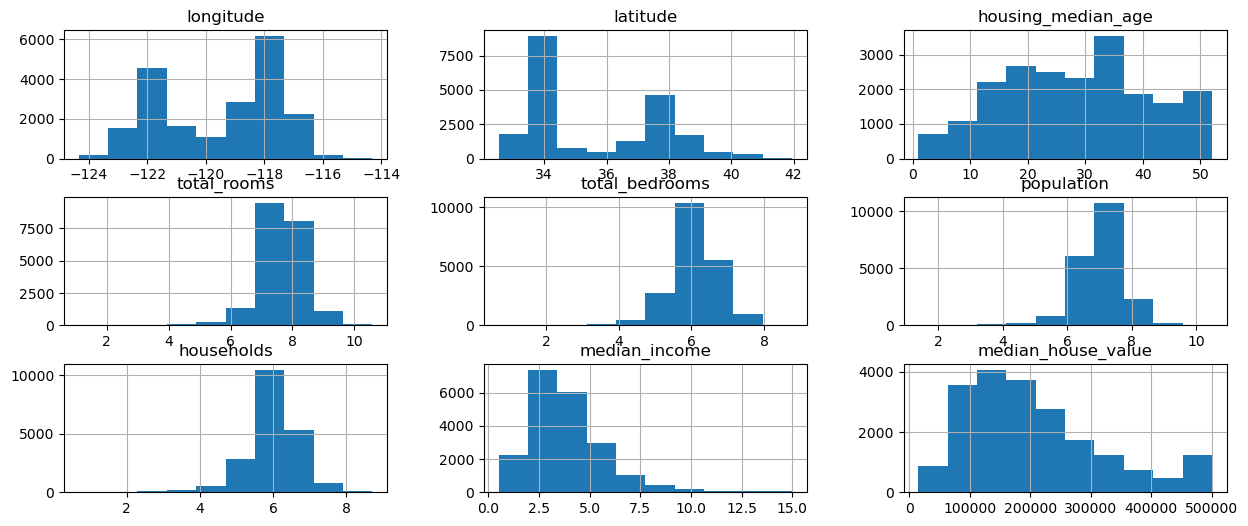

In [9]:
data.hist(figsize=(15, 6))

In [10]:
# one hot encoder better than LabelEncoder() for these cases

data = data.join(pd.get_dummies(data["ocean_proximity"])).drop(['ocean_proximity'], axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0


<AxesSubplot: >

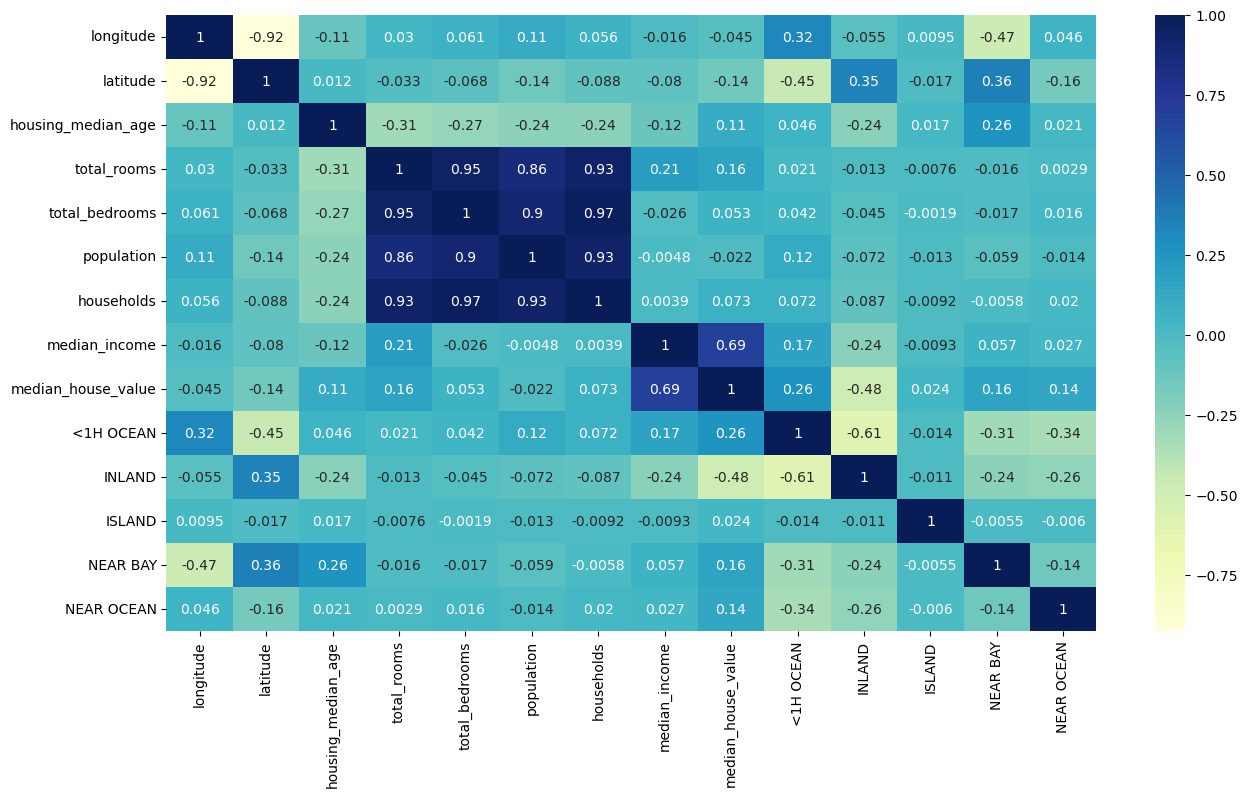

In [11]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [12]:
# we conclude that being closer to the ocean, meadian income and total rooms affect our target the most

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

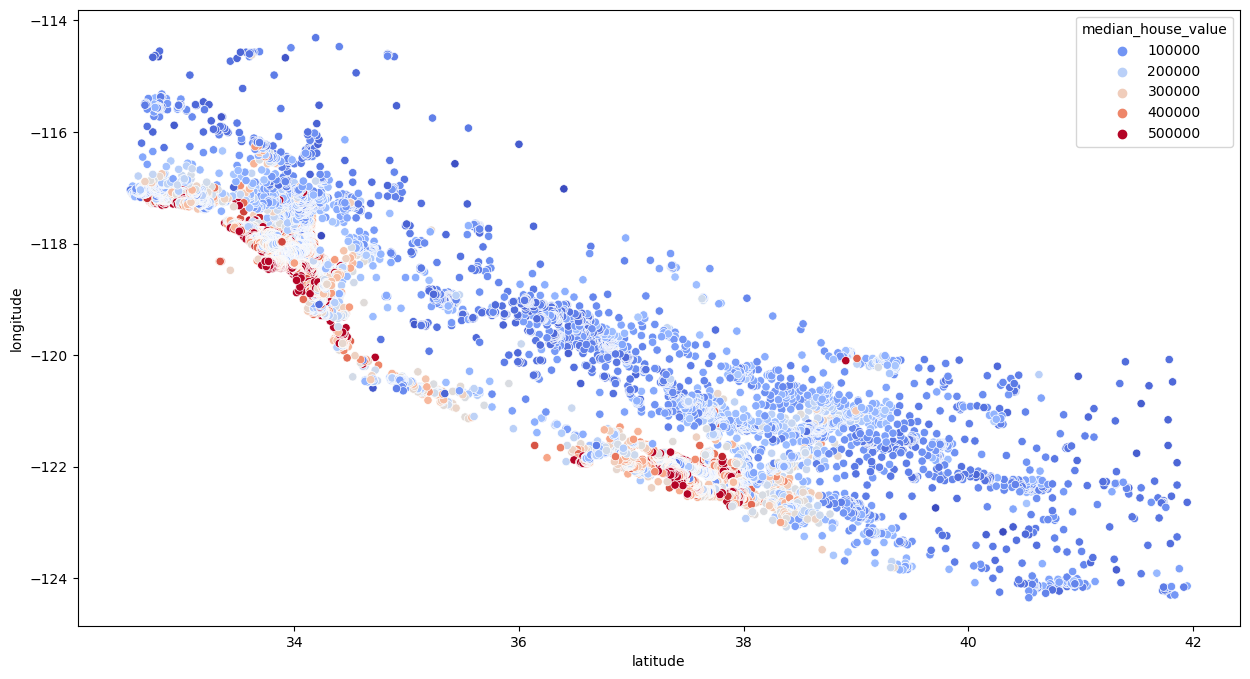

In [13]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=data, hue="median_house_value", palette="coolwarm")

In [14]:
#  we can confirm that the left down bottom houses, ie the one closer to the sea are closer and thus more expensive

In [15]:
# feature engineering
# we could drop the columns with heat values close to 0

data.loc[:, "bedroom_ratio"] = data.loc[:, "total_bedrooms"]  / data.loc[:, "total_rooms"] 
data.loc[:, "household_ratio"] = data.loc[:, "total_rooms"] / data.loc[:, "households"]   

<AxesSubplot: >

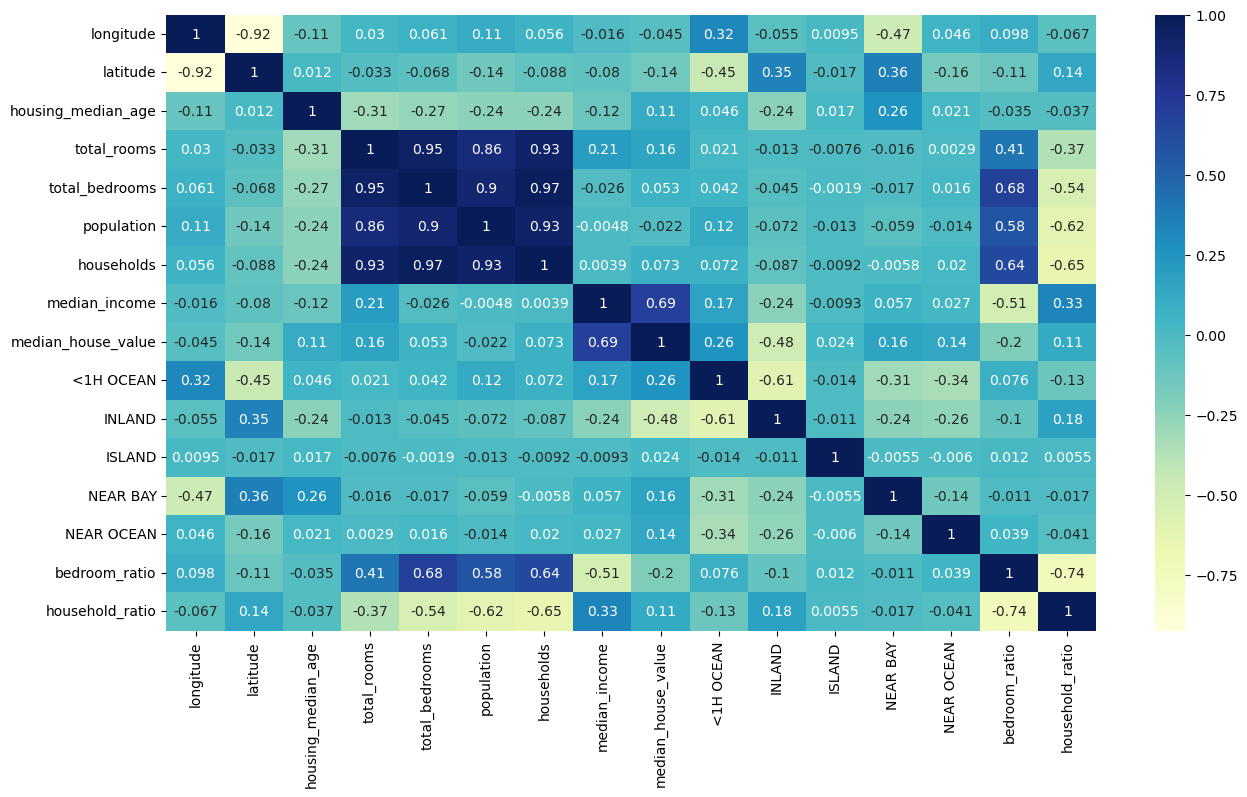

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [17]:
X = data.drop(['median_house_value'], axis=1)
y = data.loc[:, 'median_house_value']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16346, 15)
(16346,)
(4087, 15)
(4087,)


In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_sc, y_train)

LinearRegression()

In [21]:
print(linreg.score(X_train_sc, y_train))
linreg.score(X_test_sc, y_test)

0.6737297923827165


0.6600121978605151

In [22]:
from sklearn.linear_model import Lasso

las = Lasso()
las.fit(X_train_sc, y_train)

c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.538e+13, tolerance: 2.176e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [23]:
print(las.score(X_train_sc, y_train))
las.score(X_test_sc, y_test)

0.6737336949061082


0.6600027286369291

In [50]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(X_train_sc, y_train)

AdaBoostRegressor()

In [51]:
print(ada.score(X_train_sc, y_train))
ada.score(X_test_sc, y_test)

0.4183245199204805


0.40225535812134894

In [24]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgsr = HistGradientBoostingRegressor()
hgsr.fit(X_train_sc, y_train)

HistGradientBoostingRegressor()

In [25]:
print(hgsr.score(X_train_sc, y_train))
hgsr.score(X_test_sc, y_test)

0.8755807333695897


0.8333401795146804

In [26]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train_sc, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [27]:
print(xgb.score(X_train_sc, y_train))
xgb.score(X_test_sc, y_test)

0.9416922804920246


0.8305090429581338

In [28]:
# hyperparameter training

# n_estimators
# max_depth
# eta
# subsample
# colsample_bytree

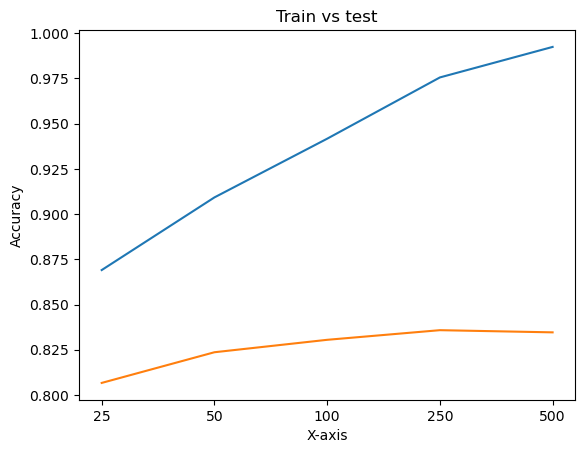

In [29]:
est = [25, 50, 100, 250, 500]

accuracy_list_train = []
accuracy_list_test = []

for i in est:
    model = XGBRegressor(n_estimators=i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(model.score(X_train_sc, y_train))
    accuracy_list_test.append(model.score(X_test_sc, y_test))


plt.title("Train vs test")
plt.xlabel("X-axis")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(est)), labels=est)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [30]:
# 100 or 250 is the optimal value for n_estimatrs

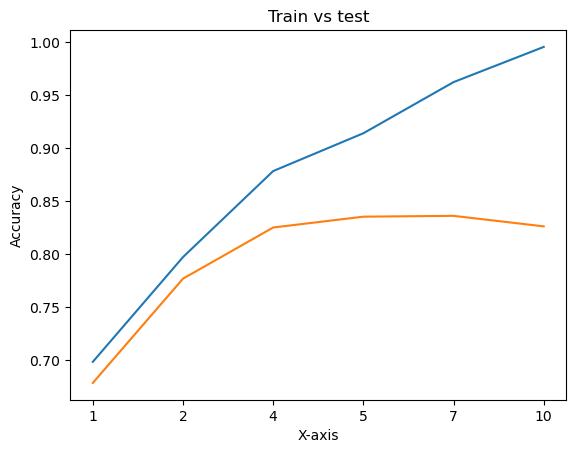

In [31]:
maxd = [1, 2, 4, 5, 7, 10]

accuracy_list_train = []
accuracy_list_test = []

for i in maxd:
    model = XGBRegressor(max_depth = i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(model.score(X_train_sc, y_train))
    accuracy_list_test.append(model.score(X_test_sc, y_test))


plt.title("Train vs test")
plt.xlabel("X-axis")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(maxd)), labels=maxd)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [32]:
# the optimal value for max_depth is either 4 or 5

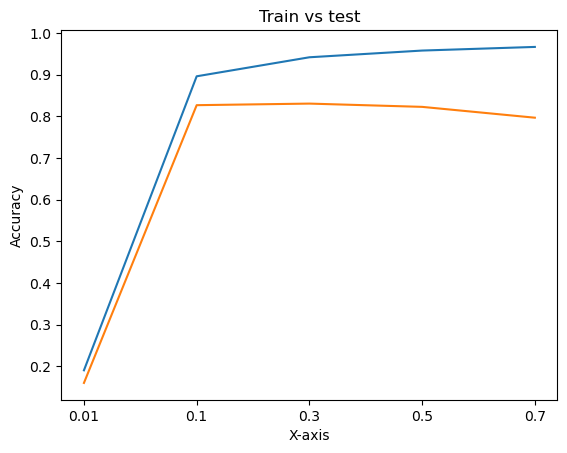

In [33]:
lr = [0.01, 0.1, 0.3, 0.5, 0.7]

accuracy_list_train = []
accuracy_list_test = []

for i in lr:
    model = XGBRegressor(eta = i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(model.score(X_train_sc, y_train))
    accuracy_list_test.append(model.score(X_test_sc, y_test))


plt.title("Train vs test")
plt.xlabel("X-axis")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(lr)), labels=lr)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [34]:
# 0.1 or 0.3 can be the optimal values for eta

[11:48:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytrees" } are not used.

[11:48:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytrees" } are not used.

[11:48:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytrees" } are not used.

[11:48:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytrees" } are not used.



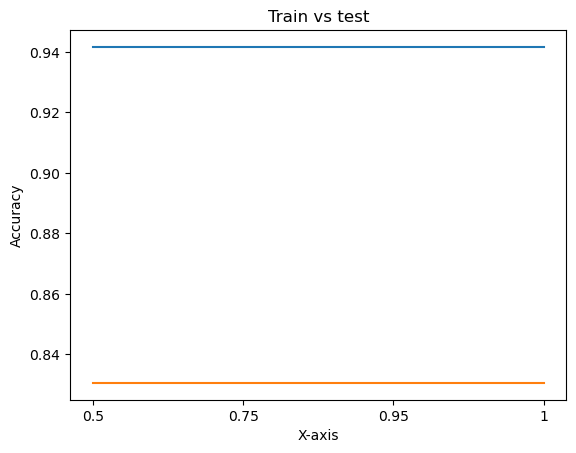

In [35]:
cols = [0.5, 0.75, 0.95, 1]

accuracy_list_train = []
accuracy_list_test = []

for i in cols:
    model = XGBRegressor(colsample_bytrees = i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(model.score(X_train_sc, y_train))
    accuracy_list_test.append(model.score(X_test_sc, y_test))


plt.title("Train vs test")
plt.xlabel("X-axis")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(cols)), labels=cols)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [36]:
# we will use 1 since it foesnt affect model

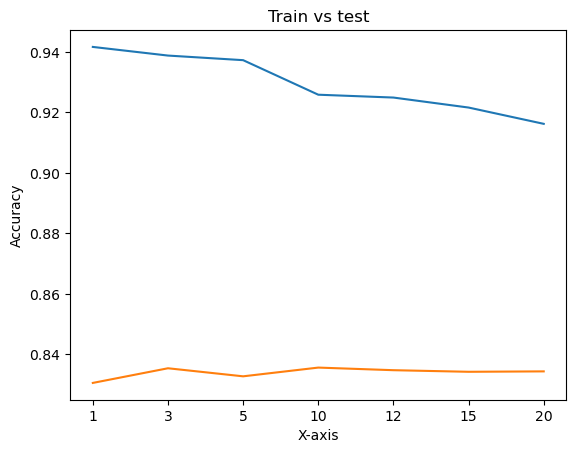

In [37]:
minc = [1, 3, 5, 10, 12, 15, 20]

accuracy_list_train = []
accuracy_list_test = []

for i in minc:
    model = XGBRegressor(min_child_weight = i)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(model.score(X_train_sc, y_train))
    accuracy_list_test.append(model.score(X_test_sc, y_test))


plt.title("Train vs test")
plt.xlabel("X-axis")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(minc)), labels=minc)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

In [38]:
# 10 seems to be the optimal value

In [39]:
final_model = XGBRegressor(n_estimators = 500, max_depth = 6, eta = 0.1, columns_bytrees= 1, min_child_weight=1)
final_model.fit(X_train_sc, y_train)

[11:48:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "columns_bytrees" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, columns_bytrees=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None, ...)

In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, final_model.predict(X_test_sc))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, final_model.predict(X_test_sc))

In [46]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 2068341846.71
Root Mean Squared Error (RMSE): 45479.03
Mean Absolute Error (MAE): 30074.07


In [49]:
print("Final Accuracies: \n")
print(final_model.score(X_train_sc, y_train))
final_model.score(X_test_sc, y_test)

Final Accuracies: 

0.9629811561554223


0.8454805359893747